In [28]:
#pip install emoji

In [3]:
#pip install chefboost

In [14]:
#pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import re
import emoji
from nltk.stem.porter import PorterStemmer
import nltk
import re, string
from nltk.corpus import stopwords
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import nltk
import nltk 
from chefboost import Chefboost as chef
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Download the Bengali stopwords
nltk.download('stopwords')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import string

In [ ]:
# Load the dataset
cd = pd.read_excel("D:\\NIBIR 192\\CyberBulling_Dataset_Bangla.xlsx")

cd=cd.drop(['Unnamed: 0'], axis=1)
cd['Label'].value_counts()
# Define the mapping dictionary
label_mapping = {'Neutral': 0, 'Political': 1, 'troll':1, 'sexual':1,'Threat':1}

# Map the target column to numerical values
cd['Label'] = cd['Label'].map(label_mapping)
# Preprocess the data
cd['texts'] = cd['Description'].astype(str)
cd['Label']= cd['Label'].astype(int)
# Preprocess the data
texts = cd['Description'].astype(str)
labels = cd['Label'].astype(int)
# Split the dataset into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [200]:
def remove_punc(text):
    whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
    bangla_fullstop = u"\u0964"
    punctSeq   = u"['\"“”‘’]+|[.?!,…]+|[:;]+"
    punc = u"[৷–()—,$%^&*+={}\[\]:\"|\'\~`<>/,€¦!?½£¶™¼©⅐⅑⅒⅓⅔⅕⅖⅗⅘⅙⅚⅛⅜⅝⅞⅟↉¤¿º;-]+"
    text= whitespace.sub(" ",text).strip()
    text= re.sub(punctSeq, " ", text)
    text = re.sub(bangla_fullstop, " ",text)
    text = re.sub(punc, " ", text)
    text = re.sub('\w*\d\w*', " ", text)
def get_emoji_regexp():
    text = re.sub(emoji.get_emoji_regexp(), "", text)
    return text

In [201]:
cd['Clean']= cd['Description'].apply(lambda x: remove_punc(x))
cd

,Description,Label,texts,Clean
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,1,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,None
1,আপনার জন্ম প্রক্রিয়ার সময় আপনার মায়ের ভিতর কি ...,1,আপনার জন্ম প্রক্রিয়ার সময় আপনার মায়ের ভিতর কি ...,None
2,ধজভংগ দের আর ভায়াগ্রা লাগবো না। ধংস হোক এই সব ...,1,ধজভংগ দের আর ভায়াগ্রা লাগবো না। ধংস হোক এই সব ...,None
3,বোকাচোদা একটা।,1,বোকাচোদা একটা।,None
4,তোর দেশে ফেরার অপেক্ষায় রইলাম। জেলে একটা কামরা...,1,তোর দেশে ফেরার অপেক্ষায় রইলাম। জেলে একটা কামরা...,None
...,...,...,...,...
6005,কপাল পোড়া,0,কপাল পোড়া,None
6006,আল্লাহ আপনাকে হেদায়েত দান করুক আমীন।আমিও একজন ...,0,আল্লাহ আপনাকে হেদায়েত দান করুক আমীন।আমিও একজন ...,None
6007,"শুধু সুন্দর চেহারার হিরো আপনি নন, সুন্দর মনের ...",0,"শুধু সুন্দর চেহারার হিরো আপনি নন, সুন্দর মনের ...",None
6008,আল্লাহ আপনাকে সুস্থ রাখুক। ভাইরাস থেকে দেশের ম...,0,আল্লাহ আপনাকে সুস্থ রাখুক। ভাইরাস থেকে দেশের ম...,None


In [ ]:
#tokenization
import nltk
nltk.download('punkt')
cd['new'] = cd.apply(lambda row: nltk.word_tokenize(row['Description']), axis=1)

In [203]:
cd

,Description,Label,texts,Clean,new
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,1,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,None,"[ওই, হালার, পুত, এখন, কি, মদ, খাওয়ার, সময়, র..."
1,আপনার জন্ম প্রক্রিয়ার সময় আপনার মায়ের ভিতর কি ...,1,আপনার জন্ম প্রক্রিয়ার সময় আপনার মায়ের ভিতর কি ...,None,"[আপনার, জন্ম, প্রক্রিয়ার, সময়, আপনার, মায়ের, ভ..."
2,ধজভংগ দের আর ভায়াগ্রা লাগবো না। ধংস হোক এই সব ...,1,ধজভংগ দের আর ভায়াগ্রা লাগবো না। ধংস হোক এই সব ...,None,"[ধজভংগ, দের, আর, ভায়াগ্রা, লাগবো, না।, ধংস, হো..."
3,বোকাচোদা একটা।,1,বোকাচোদা একটা।,None,"[বোকাচোদা, একটা।]"
4,তোর দেশে ফেরার অপেক্ষায় রইলাম। জেলে একটা কামরা...,1,তোর দেশে ফেরার অপেক্ষায় রইলাম। জেলে একটা কামরা...,None,"[তোর, দেশে, ফেরার, অপেক্ষায়, রইলাম।, জেলে, একট..."
...,...,...,...,...,...
6005,কপাল পোড়া,0,কপাল পোড়া,None,"[কপাল, পোড়া]"
6006,আল্লাহ আপনাকে হেদায়েত দান করুক আমীন।আমিও একজন ...,0,আল্লাহ আপনাকে হেদায়েত দান করুক আমীন।আমিও একজন ...,None,"[আল্লাহ, আপনাকে, হেদায়েত, দান, করুক, আমীন।আমিও..."
6007,"শুধু সুন্দর চেহারার হিরো আপনি নন, সুন্দর মনের ...",0,"শুধু সুন্দর চেহারার হিরো আপনি নন, সুন্দর মনের ...",None,"[শুধু, সুন্দর, চেহারার, হিরো, আপনি, নন, ,, সুন..."
6008,আল্লাহ আপনাকে সুস্থ রাখুক। ভাইরাস থেকে দেশের ম...,0,আল্লাহ আপনাকে সুস্থ রাখুক। ভাইরাস থেকে দেশের ম...,None,"[আল্লাহ, আপনাকে, সুস্থ, রাখুক।, ভাইরাস, থেকে, ..."


In [204]:
#Stopword
stopwords="অতএব অথচ অথবা অনুযায়ী অনেক অনেকে অনেকেই অন্তত অন্য অবধি অবশ্য অর্থাত আই আগামী আগে আগেই আছে আজ আদ্যভাগে আপনার আপনি আবার আমরা আমাকে আমাদের আমার আমি আর আরও ই ইত্যাদি ইহা উচিত উত্তর উনি উপর উপরে এ এঁদের এঁরা এই একই একটি একবার একে এক্ এখন এখনও এখানে এখানেই এটা এটাই এটি এত এতটাই এতে এদের এব এবং এবার এমন এমনকী এমনি এর এরা এল এস এসে ঐ ও ওঁদের ওঁর ওঁরা ওই ওকে ওখানে ওদের ওর ওরা কখনও কত কবে কমনে কয়েক কয়েকটি করছে করছেন করতে করবে করবেন করলে করলেন করা করাই করায় করার করি করিতে করিয়া করিয়ে করে করেই করেছিলেন করেছে করেছেন করেন কাউকে কাছ কাছে কাজ কাজে কারও কারণ কি কিংবা কিছু কিছুই কিন্তু কী কে কেউ কেউই কেখা কেন কোটি কোন কোনও কোনো ক্ষেত্রে কয়েক খুব গিয়ে গিয়েছে গিয়ে গুলি গেছে গেল গেলে গোটা চলে চান চায় চার চালু চেয়ে চেষ্টা ছাড়া ছাড়াও ছিল ছিলেন জন জনকে জনের জন্য জন্যওজে জানতে জানা জানানো জানায় জানিয়ে জানিয়েছে জে জ্নজন টি ঠিক তখন তত তথা তবু তবে তা তাঁকে তাঁদের তাঁর তাঁরা তাঁাহারা তাই তাও তাকে তাতে তাদের তার তারপর তারা তারৈ তাহলে তাহা তাহাতে তাহার তিনঐ তিনি তিনিও তুমি তুলে তেমন তো তোমার থাকবে থাকবেন থাকা থাকায় থাকে থাকেন থেকে থেকেই থেকেও দিকে দিতে দিন দিয়ে দিয়েছে দিয়েছেন দিলেন দু দুই দুটি দুটো দেওয়া দেওয়ার দেওয়া দেখতে দেখা দেখে দেন দেয় দ্বারা ধরা ধরে ধামার নতুন নয় না নাই নাকি নাগাদ নানা নিজে নিজেই নিজেদের নিজের নিতে নিয়ে নিয়ে নেই নেওয়া নেওয়ার নেওয়া নয় পক্ষে পর পরে পরেই পরেও পর্যন্ত পাওয়া পাচ পারি পারে পারেন পি পেয়ে পেয়্র্ প্রতি প্রথম প্রভৃতি প্রযন্ত প্রাথমিক প্রায় প্রায় ফলে ফিরে ফের বক্তব্য বদলে বন বরং বলতে বলল বললেন বলা বলে বলেছেন বলেন বসে বহু বা বাদে বার বি বিনা বিভিন্ন বিশেষ বিষয়টি বেশ বেশি ব্যবহার ব্যাপারে ভাবে ভাবেই মতো মতোই মধ্যভাগে মধ্যে মধ্যেই মধ্যেও মনে মাত্র মাধ্যমে মোট মোটেই যখন যত যতটা যথেষ্ট যদি যদিও যা যাঁর যাঁরা যাওয়া যাওয়ার যাওয়া যাকে যাচ্ছে যাতে যাদের যান যাবে যায় যার যারা যিনি যে যেখানে যেতে যেন যেমন র রকম রয়েছে রাখা রেখে লক্ষ শুধু শুরু সঙ্গে সঙ্গেও সব সবার সমস্ত সম্প্রতি সহ সহিত সাধারণ সামনে সি সুতরাং সে সেই সেখান সেখানে সেটা সেটাই সেটাও সেটি স্পষ্ট স্বয়ং হইতে হইবে হইয়া হওয়া হওয়ায় হওয়ার হচ্ছে হত হতে হতেই হন হবে হবেন হয় হয়তো হয়নি হয়ে হয়েই হয়েছিল হয়েছে হয়েছেন হল হলে হলেই হলেও হলো হাজার হিসাবে হৈলে হোক হয়"
doc=stopwords.split()
doc

['অতএব',
 'অথচ',
 'অথবা',
 'অনুযায়ী',
 'অনেক',
 'অনেকে',
 'অনেকেই',
 'অন্তত',
 'অন্য',
 'অবধি',
 'অবশ্য',
 'অর্থাত',
 'আই',
 'আগামী',
 'আগে',
 'আগেই',
 'আছে',
 'আজ',
 'আদ্যভাগে',
 'আপনার',
 'আপনি',
 'আবার',
 'আমরা',
 'আমাকে',
 'আমাদের',
 'আমার',
 'আমি',
 'আর',
 'আরও',
 'ই',
 'ইত্যাদি',
 'ইহা',
 'উচিত',
 'উত্তর',
 'উনি',
 'উপর',
 'উপরে',
 'এ',
 'এঁদের',
 'এঁরা',
 'এই',
 'একই',
 'একটি',
 'একবার',
 'একে',
 'এক্',
 'এখন',
 'এখনও',
 'এখানে',
 'এখানেই',
 'এটা',
 'এটাই',
 'এটি',
 'এত',
 'এতটাই',
 'এতে',
 'এদের',
 'এব',
 'এবং',
 'এবার',
 'এমন',
 'এমনকী',
 'এমনি',
 'এর',
 'এরা',
 'এল',
 'এস',
 'এসে',
 'ঐ',
 'ও',
 'ওঁদের',
 'ওঁর',
 'ওঁরা',
 'ওই',
 'ওকে',
 'ওখানে',
 'ওদের',
 'ওর',
 'ওরা',
 'কখনও',
 'কত',
 'কবে',
 'কমনে',
 'কয়েক',
 'কয়েকটি',
 'করছে',
 'করছেন',
 'করতে',
 'করবে',
 'করবেন',
 'করলে',
 'করলেন',
 'করা',
 'করাই',
 'করায়',
 'করার',
 'করি',
 'করিতে',
 'করিয়া',
 'করিয়ে',
 'করে',
 'করেই',
 'করেছিলেন',
 'করেছে',
 'করেছেন',
 'করেন',
 'কাউকে',
 'কাছ',
 'কাছে',
 'কাজ',
 'কাজে',
 'কারও',
 '

In [205]:
def reomve_stopwrds(text):
    text=[word for word in text if word not in doc]
    return text

In [206]:
cd['cmt_r_wrds']= cd['new'].apply(lambda x: reomve_stopwrds(x))
cd

,Description,Label,texts,Clean,new,cmt_r_wrds
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,1,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,None,"[ওই, হালার, পুত, এখন, কি, মদ, খাওয়ার, সময়, র...","[হালার, পুত, মদ, খাওয়ার, সময়, রাতের, বেলা, ম..."
1,আপনার জন্ম প্রক্রিয়ার সময় আপনার মায়ের ভিতর কি ...,1,আপনার জন্ম প্রক্রিয়ার সময় আপনার মায়ের ভিতর কি ...,None,"[আপনার, জন্ম, প্রক্রিয়ার, সময়, আপনার, মায়ের, ভ...","[জন্ম, প্রক্রিয়ার, সময়, মায়ের, ভিতর, বাবা, হুম..."
2,ধজভংগ দের আর ভায়াগ্রা লাগবো না। ধংস হোক এই সব ...,1,ধজভংগ দের আর ভায়াগ্রা লাগবো না। ধংস হোক এই সব ...,None,"[ধজভংগ, দের, আর, ভায়াগ্রা, লাগবো, না।, ধংস, হো...","[ধজভংগ, দের, ভায়াগ্রা, লাগবো, না।, ধংস, কুলখান..."
3,বোকাচোদা একটা।,1,বোকাচোদা একটা।,None,"[বোকাচোদা, একটা।]","[বোকাচোদা, একটা।]"
4,তোর দেশে ফেরার অপেক্ষায় রইলাম। জেলে একটা কামরা...,1,তোর দেশে ফেরার অপেক্ষায় রইলাম। জেলে একটা কামরা...,None,"[তোর, দেশে, ফেরার, অপেক্ষায়, রইলাম।, জেলে, একট...","[তোর, দেশে, ফেরার, অপেক্ষায়, রইলাম।, জেলে, একট..."
...,...,...,...,...,...,...
6005,কপাল পোড়া,0,কপাল পোড়া,None,"[কপাল, পোড়া]","[কপাল, পোড়া]"
6006,আল্লাহ আপনাকে হেদায়েত দান করুক আমীন।আমিও একজন ...,0,আল্লাহ আপনাকে হেদায়েত দান করুক আমীন।আমিও একজন ...,None,"[আল্লাহ, আপনাকে, হেদায়েত, দান, করুক, আমীন।আমিও...","[আল্লাহ, আপনাকে, হেদায়েত, দান, করুক, আমীন।আমিও..."
6007,"শুধু সুন্দর চেহারার হিরো আপনি নন, সুন্দর মনের ...",0,"শুধু সুন্দর চেহারার হিরো আপনি নন, সুন্দর মনের ...",None,"[শুধু, সুন্দর, চেহারার, হিরো, আপনি, নন, ,, সুন...","[সুন্দর, চেহারার, হিরো, নন, ,, সুন্দর, মনের, হ..."
6008,আল্লাহ আপনাকে সুস্থ রাখুক। ভাইরাস থেকে দেশের ম...,0,আল্লাহ আপনাকে সুস্থ রাখুক। ভাইরাস থেকে দেশের ম...,None,"[আল্লাহ, আপনাকে, সুস্থ, রাখুক।, ভাইরাস, থেকে, ...","[আল্লাহ, আপনাকে, সুস্থ, রাখুক।, ভাইরাস, দেশের,..."


In [207]:
x=cd.iloc[:, 4]
y=cd.iloc[:, 1]

In [208]:
import gensim
from gensim.models import Word2Vec
model1 = gensim.models.Word2Vec(x,vector_size=100, window=5, min_count=1, workers=4)

In [209]:
vec=model1.wv['জামাই']-model1.wv['আদর']+model1.wv['শালা']

In [226]:
d=model1.wv.most_similar([vec])
d

[('শালা', 0.9994972944259644),
 ('ও', 0.9990857243537903),
 ('তারা', 0.9990807771682739),
 ('সব', 0.999068021774292),
 ('এখন', 0.9990647435188293),
 ('ওর', 0.9990527033805847),
 ('তোদের', 0.99903404712677),
 ('(', 0.9990338087081909),
 ('এদের', 0.9990279674530029),
 ('চেষ্টা', 0.9990213513374329)]

In [211]:
#pip install wordcloud matplotlib

In [264]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

# Generate a frequency count of words
word_freq = {}
punctuation_marks = ['।', ',', '!', '?', ':', ';','...','.']  # Add other Bangla punctuation marks as needed

for text in cd['cmt_r_wrds']:
    for word in text:
        if word not in punctuation_marks:
            if word in word_freq:
                word_freq[word] += 1
            else:
                word_freq[word] = 1

# Sort the word frequency dictionary by values in descending order
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Select the top 10 most frequently used words
top_10_words = dict(sorted_word_freq[:20])
top_10_words


{'জুতা': 523,
 'বিশ্বাস': 497,
 'কথা': 478,
 'তুই': 436,
 'একটা': 409,
 'তোর': 381,
 'আল্লাহ': 350,
 'দিয়ে': 335,
 'না।': 280,
 'মানুষ': 260,
 'হয়ে': 248,
 'মত': 235,
 'রাজাকার': 226,
 'সাথে': 224,
 'সাফা': 224,
 'ভালো': 216,
 'ক্ষমা': 207,
 'ভাই': 207,
 'দেশ': 200,
 'এক': 195}

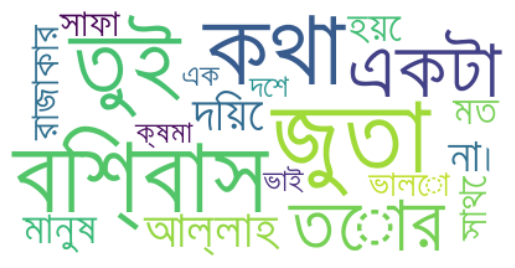

In [269]:
# Create a word cloud using the selected words
wordcloud = WordCloud(font_path='siyamrupali.ttf', background_color='white').generate_from_frequencies(top_10_words)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [52]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(tokenizer=lambda doc1: doc1, lowercase=False)
X = vec.fit_transform(x)
print(X.shape)
X


(6010, 21369)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<6010x21369 sparse matrix of type '<class 'numpy.int64'>'
	with 98614 stored elements in Compressed Sparse Row format>

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state = 1)

In [54]:
lstm_params = {
    'dropout_rate': 0.3,
    'units': 100
}

# Define the models
models = {
    'ANN': MLPClassifier(max_iter=500),
    'CNN': Sequential([
        Embedding(vocab_size, 100, input_length=max_sequence_length),
        Conv1D(128, 5, activation='relu'),
        MaxPooling1D(pool_size=2),
        Conv1D(64, 5, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(1, activation='sigmoid')
    ]),
    'LSTM': Sequential([
        Embedding(vocab_size, 100, input_length=max_sequence_length),
        LSTM(units=lstm_params['units'], dropout=lstm_params['dropout_rate'], recurrent_dropout=0.2),
        Dense(1, activation='sigmoid')
    ]),
    'XGB': XGBClassifier(learning_rate=0.1, max_depth=4, n_estimators=300),
    'Random Forest': RandomForestClassifier(max_depth= None, min_samples_leaf= 1,min_samples_split= 10,n_estimators= 100),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate=0.1, max_depth= 5, n_estimators= 200),
    'AdaBoost': AdaBoostClassifier(),
    'Logistic Regression': LogisticRegression(random_state=30),
    'DecisionTreeClassifier': DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=30),
    'SVM': SVC(probability=True)
}

Model: ANN
Accuracy: 0.6123128119800333
Precision: 0.8335570469798658
Recall: 0.6448598130841121
F1 Score: 0.7271662763466041
AUC-ROC: 0.5629005418040729


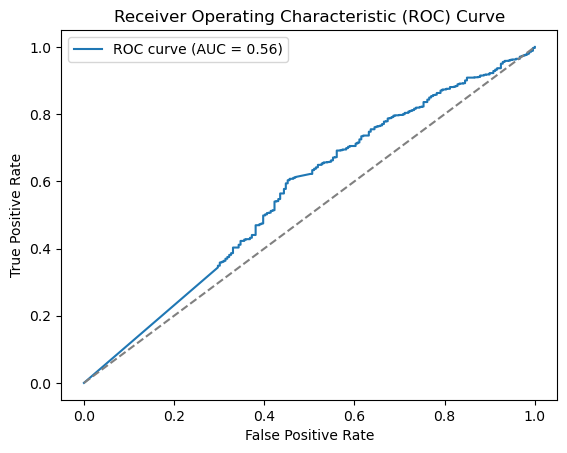

38/38 [==============================] - 0s 6ms/step
Model: CNN
Loss: 0.012597071006894112
Accuracy: 0.9906405806541443
Precision: 0.8878968253968254
Recall: 0.9293873312564901
F1 Score: 0.9081684424150177
AUC-ROC: 0.87199824467646


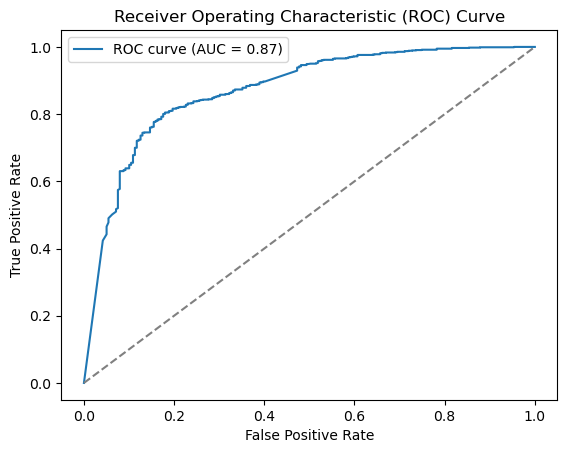

38/38 [==============================] - 2s 45ms/step
Model: LSTM
Loss: 0.0002296407037647441
Accuracy: 1.0
Precision: 0.9022931206380858
Recall: 0.9397715472481828
F1 Score: 0.9206510681586979
AUC-ROC: 0.8725218003362921


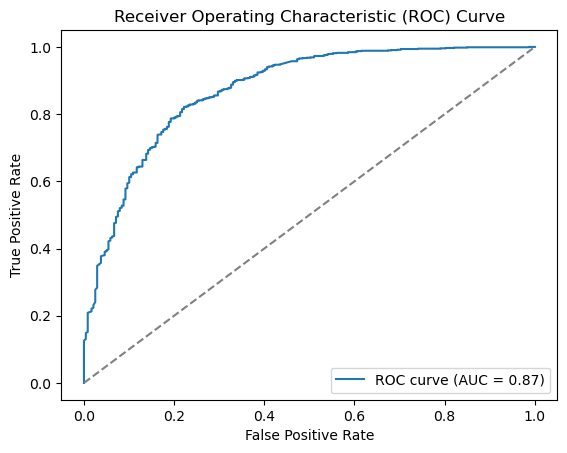

Model: XGB
Accuracy: 0.800332778702163
Precision: 0.8113695090439277
Recall: 0.9781931464174455
F1 Score: 0.8870056497175142
AUC-ROC: 0.6370064781866291


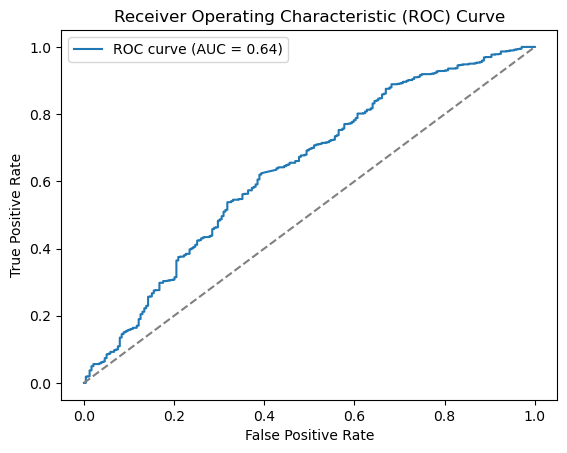

Model: Random Forest
Accuracy: 0.7978369384359401
Precision: 0.810880829015544
Recall: 0.9750778816199377
F1 Score: 0.8854314002828854
AUC-ROC: 0.629174867590384


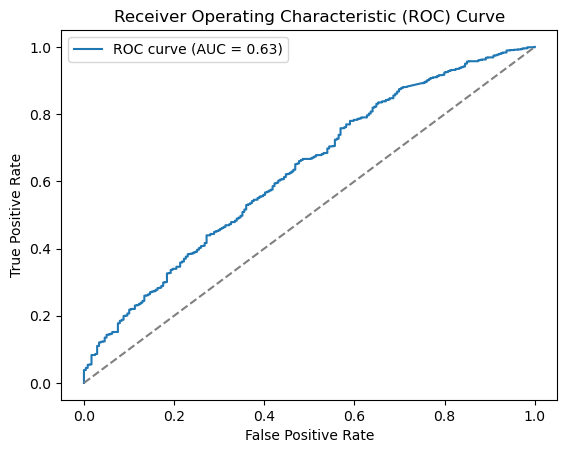

Model: Gradient Boosting
Accuracy: 0.7953410981697171
Precision: 0.8141980718667835
Recall: 0.9646936656282451
F1 Score: 0.8830798479087453
AUC-ROC: 0.6669577723032539


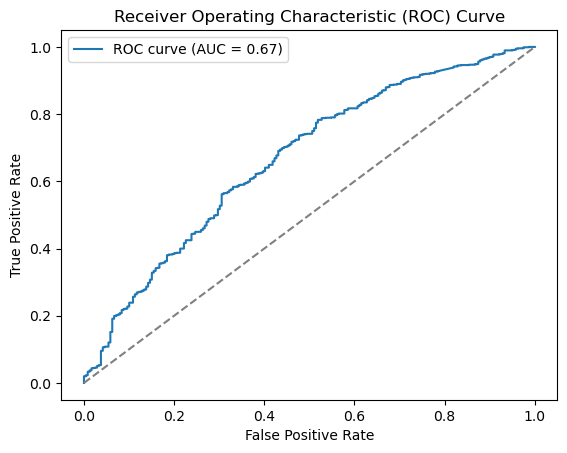

Model: AdaBoost
Accuracy: 0.800332778702163
Precision: 0.8009991673605329
Recall: 0.9989615784008308
F1 Score: 0.88909426987061
AUC-ROC: 0.6103203465460533


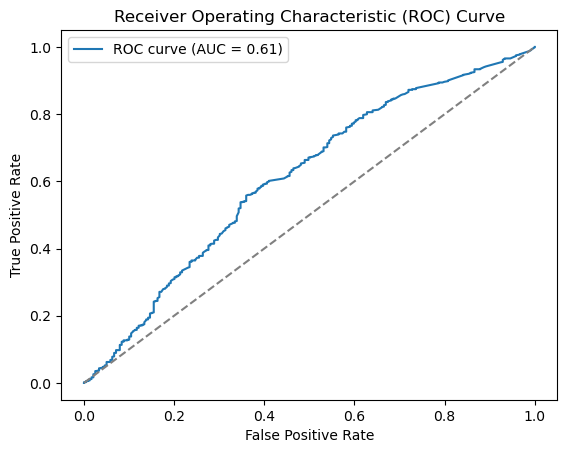

Model: Logistic Regression
Accuracy: 0.7920133111480865
Precision: 0.8008438818565401
Recall: 0.9854620976116303
F1 Score: 0.8836126629422718
AUC-ROC: 0.51324096160447


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


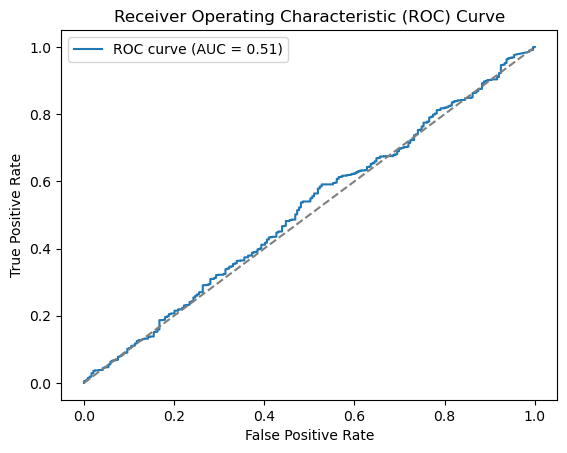

Model: DecisionTreeClassifier
Accuracy: 0.7878535773710482
Precision: 0.8149466192170819
Recall: 0.9511941848390446
F1 Score: 0.877815045519885
AUC-ROC: 0.6076221883323123


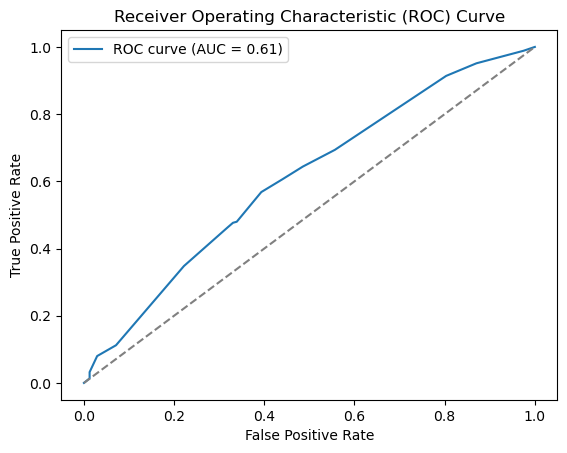

Model: SVM
Accuracy: 0.8011647254575707
Precision: 0.8011647254575707
Recall: 1.0
F1 Score: 0.889607390300231
AUC-ROC: 0.5240379393196818


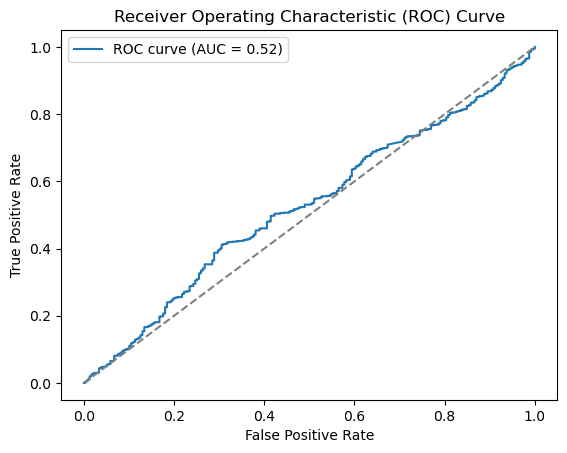

In [55]:
for model_name, model in models.items():
    if model_name in ['CNN', 'LSTM']:
        # Train the deep learning models
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        history = model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs=10, batch_size=32, verbose=0)
        probabilities = model.predict(test_data).flatten()
        predictions = (probabilities > 0.5).astype(int)
        loss = history.history['loss'][-1]
        accuracy = history.history['accuracy'][-1]
        
        precision = precision_score(test_labels, predictions)
        recall = recall_score(test_labels, predictions)
        f1 = f1_score(test_labels, predictions)
        auc_roc = roc_auc_score(test_labels, probabilities)
        fpr, tpr, thresholds = roc_curve(test_labels, probabilities)
    else:
        # Train the other models
        model.fit(train_data, train_labels)
        probabilities = model.predict_proba(test_data)[:, 1]
        predictions = model.predict(test_data)
        loss = None  # No loss calculation for non-deep learning models
        
        accuracy = accuracy_score(test_labels, predictions)
        precision = precision_score(test_labels, predictions)
        recall = recall_score(test_labels, predictions)
        f1 = f1_score(test_labels, predictions)
        auc_roc = roc_auc_score(test_labels, probabilities)
        fpr, tpr, thresholds = roc_curve(test_labels, probabilities)
    
    # Print the results
    print(f"Model: {model_name}")
    if loss is not None:
        print(f"Loss: {loss}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"AUC-ROC: {auc_roc}")
    

    # Plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

In [30]:
# Load the dataset
df = pd.read_excel("D:\\NIBIR 192\\CyberBulling_Dataset_Bangla.xlsx")

df=df.drop(['Unnamed: 0'], axis=1)
df['Label'].value_counts()
# Define the mapping dictionary
label_mapping = {'Neutral': 0, 'Political': 1, 'troll':1, 'sexual':1,'Threat':1}

# Map the target column to numerical values
df['Label'] = df['Label'].map(label_mapping)
# Preprocess the data
df['texts'] = df['Description'].astype(str)
df['Label']= df['Label'].astype(int)
# Preprocess the data
texts = df['Description'].astype(str)
labels = df['Label'].astype(int)
# Split the dataset into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [17]:
# Define the stopwords for Bengali
stop = stopwords.words('bengali')

regex = re.compile('[%s]' % re.escape(string.punctuation))

def test_re(s):
    return regex.sub('', s)

df ['content_without_stopwords'] = df['texts'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df ['content_without_puncs'] = df['content_without_stopwords'].apply(lambda x: regex.sub('',x))
del df['content_without_stopwords']
del df['texts']
df

,Description,Label,content_without_puncs
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,1,হালার পুত মদ খাওয়ার সময় রাতের বেলা মদ খাই দি...
1,আপনার জন্ম প্রক্রিয়ার সময় আপনার মায়ের ভিতর কি ...,1,জন্ম প্রক্রিয়ার সময় মায়ের ভিতর বাবা হুমায়ুন কব...
2,ধজভংগ দের আর ভায়াগ্রা লাগবো না। ধংস হোক এই সব ...,1,ধজভংগ দের ভায়াগ্রা লাগবো না। ধংস কুলখানকিরা।
3,বোকাচোদা একটা।,1,বোকাচোদা একটা।
4,তোর দেশে ফেরার অপেক্ষায় রইলাম। জেলে একটা কামরা...,1,তোর দেশে ফেরার অপেক্ষায় রইলাম। জেলে একটা কামরা...
...,...,...,...
6005,কপাল পোড়া,0,কপাল পোড়া
6006,আল্লাহ আপনাকে হেদায়েত দান করুক আমীন।আমিও একজন ...,0,আল্লাহ আপনাকে হেদায়েত দান করুক আমীন।আমিও একজন ...
6007,"শুধু সুন্দর চেহারার হিরো আপনি নন, সুন্দর মনের ...",0,সুন্দর চেহারার হিরো নন সুন্দর মনের হিরো আপনি। ...
6008,আল্লাহ আপনাকে সুস্থ রাখুক। ভাইরাস থেকে দেশের ম...,0,আল্লাহ আপনাকে সুস্থ রাখুক। ভাইরাস দেশের মানুষ ...


In [ ]:
#Stemming
porter_stemmer = PorterStemmer()
#punctuations
nltk.download('punkt')
tok_list = []
size = df.shape[0]

for i in range(size):
    word_data = df['content_without_puncs'][i]
    nltk_tokens = nltk.word_tokenize(word_data)
    final = ''
    for w in nltk_tokens:
        final = final + ' ' + porter_stemmer.stem(w)
    tok_list.append(final)

df['content_tokenize'] = tok_list
del df['content_without_puncs']
df


In [19]:
noNums = []
for i in range(len(df)):
    noNums.append(''.join([i for i in df['content_tokenize'][i] if not i.isdigit()]))

df['texts'] = noNums
df


,Description,Label,content_tokenize,texts
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,1,হালার পুত মদ খাওয়ার সময় রাতের বেলা মদ খাই দ...,হালার পুত মদ খাওয়ার সময় রাতের বেলা মদ খাই দ...
1,আপনার জন্ম প্রক্রিয়ার সময় আপনার মায়ের ভিতর কি ...,1,জন্ম প্রক্রিয়ার সময় মায়ের ভিতর বাবা হুমায়ুন ক...,জন্ম প্রক্রিয়ার সময় মায়ের ভিতর বাবা হুমায়ুন ক...
2,ধজভংগ দের আর ভায়াগ্রা লাগবো না। ধংস হোক এই সব ...,1,ধজভংগ দের ভায়াগ্রা লাগবো না। ধংস কুলখানকিরা।,ধজভংগ দের ভায়াগ্রা লাগবো না। ধংস কুলখানকিরা।
3,বোকাচোদা একটা।,1,বোকাচোদা একটা।,বোকাচোদা একটা।
4,তোর দেশে ফেরার অপেক্ষায় রইলাম। জেলে একটা কামরা...,1,তোর দেশে ফেরার অপেক্ষায় রইলাম। জেলে একটা কামর...,তোর দেশে ফেরার অপেক্ষায় রইলাম। জেলে একটা কামর...
...,...,...,...,...
6005,কপাল পোড়া,0,কপাল পোড়া,কপাল পোড়া
6006,আল্লাহ আপনাকে হেদায়েত দান করুক আমীন।আমিও একজন ...,0,আল্লাহ আপনাকে হেদায়েত দান করুক আমীন।আমিও একজন...,আল্লাহ আপনাকে হেদায়েত দান করুক আমীন।আমিও একজন...
6007,"শুধু সুন্দর চেহারার হিরো আপনি নন, সুন্দর মনের ...",0,সুন্দর চেহারার হিরো নন সুন্দর মনের হিরো আপনি।...,সুন্দর চেহারার হিরো নন সুন্দর মনের হিরো আপনি।...
6008,আল্লাহ আপনাকে সুস্থ রাখুক। ভাইরাস থেকে দেশের ম...,0,আল্লাহ আপনাকে সুস্থ রাখুক। ভাইরাস দেশের মানুষ...,আল্লাহ আপনাকে সুস্থ রাখুক। ভাইরাস দেশের মানুষ...


In [20]:
tfIdfVectorizer = TfidfVectorizer(use_idf=True, sublinear_tf=True)
tfIdf = tfIdfVectorizer.fit_transform(df.texts.tolist())
get_feature_names = [word for word, index in sorted(tfIdfVectorizer.vocabulary_.items(), key=lambda x: x[1])]

print(tfIdf)


  (0, 1086)	0.3705265284487631
  (0, 865)	0.21108664939608163
  (0, 838)	0.2508056515528805
  (0, 1092)	0.16280116019123972
  (0, 378)	0.3292774013874669
  (0, 2563)	0.3037428111009259
  (0, 3127)	0.5352898644717428
  (0, 1245)	0.2804344568837347
  (0, 2559)	0.4035874125615631
  (1, 932)	0.1758496315078995
  (1, 1072)	0.22330767544580235
  (1, 719)	0.2966926346490922
  (1, 717)	0.15181891167413772
  (1, 1368)	0.10690730733371973
  (1, 2188)	0.3302887525068166
  (1, 572)	0.16849197077771996
  (1, 931)	0.256411633602028
  (1, 3225)	0.1640994181867216
  (1, 2442)	0.19941059670281455
  (1, 2757)	0.18796986801776777
  (1, 696)	0.14608642871352295
  (1, 2133)	0.184031267301388
  (1, 981)	0.1778018601214014
  (1, 3186)	0.225345163334515
  (1, 1021)	0.3932167783847945
  :	:
  (6006, 740)	0.33992764209417625
  (6006, 717)	0.33751715562663
  (6006, 1368)	0.2376716437305733
  (6006, 696)	0.324772950558834
  (6006, 1086)	0.23089617018558176
  (6007, 938)	0.47036120485060956
  (6007, 1985)	0.595466

In [21]:
def display_scores(vectorizer, tfidf_result, top_n=25):
    feature_names = [word for word, index in sorted(vectorizer.vocabulary_.items(), key=lambda x: x[1])]
    tfidf_scores = np.asarray(tfidf_result.sum(axis=0)).ravel()
    scores = zip(feature_names, tfidf_scores)
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    for i, (feature, score) in enumerate(sorted_scores[:top_n], 1):
        print(f"{i}. {feature:<20} Score: {score:.4f}")

In [22]:
display_scores(tfIdfVectorizer, tfIdf)

1. কর                   Score: 193.3021
2. রত                   Score: 163.7289
3. আল                   Score: 152.1275
4. একট                  Score: 126.5476
5. কথ                   Score: 120.9240
6. হয়                   Score: 104.8659
7. গল                   Score: 103.4213
8. মন                   Score: 100.8282
9. জন                   Score: 97.4108
10. নক                   Score: 96.2110
11. সব                   Score: 93.4996
12. পর                   Score: 92.5739
13. বল                   Score: 92.3476
14. কব                   Score: 89.1307
15. মত                   Score: 82.0438
16. তর                   Score: 81.3360
17. আপন                  Score: 80.1818
18. দরক                  Score: 76.0674
19. ইল                   Score: 73.3838
20. আম                   Score: 70.7927
21. ওয়                   Score: 68.3423
22. আলম                  Score: 64.5134
23. রক                   Score: 63.9306
24. দর                   Score: 63.7111
25. টক                   Score: 62.3461


In [23]:
#texts = tfIdf
#labels = np.array(df.Label.tolist())
# Split the dataset into training and testing sets
#train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [24]:
# Tokenize the text and convert them to sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_texts)
vocab_size = len(tokenizer.word_index) + 1
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

# Pad the sequences to have the same length
max_sequence_length = max(len(seq) for seq in train_sequences)
train_data = pad_sequences(train_sequences, maxlen=max_sequence_length)
test_data = pad_sequences(test_sequences, maxlen=max_sequence_length)

In [25]:
lstm_params = {
    'dropout_rate': 0.3,
    'units': 100
}

# Define the models
models = {
    'ANN': MLPClassifier(max_iter=500),
    'CNN': Sequential([
        Embedding(vocab_size, 100, input_length=max_sequence_length),
        Conv1D(128, 5, activation='relu'),
        MaxPooling1D(pool_size=2),
        Conv1D(64, 5, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(1, activation='sigmoid')
    ]),
    'LSTM': Sequential([
        Embedding(vocab_size, 100, input_length=max_sequence_length),
        LSTM(units=lstm_params['units'], dropout=lstm_params['dropout_rate'], recurrent_dropout=0.2),
        Dense(1, activation='sigmoid')
    ]),
    'XGB': XGBClassifier(learning_rate=0.1, max_depth=4, n_estimators=300),
    'Random Forest': RandomForestClassifier(max_depth= None, min_samples_leaf= 1,min_samples_split= 10,n_estimators= 100),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate=0.1, max_depth= 5, n_estimators= 200),
    'AdaBoost': AdaBoostClassifier(),
    'Logistic Regression': LogisticRegression(random_state=30),
    'DecisionTreeClassifier': DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=30),
    'SVM': SVC(probability=True)
}

Model: ANN
Accuracy: 0.7237936772046589
Precision: 0.7979225684608121
Recall: 0.877466251298027
F1 Score: 0.8358061325420376
AUC-ROC: 0.5076447816055997


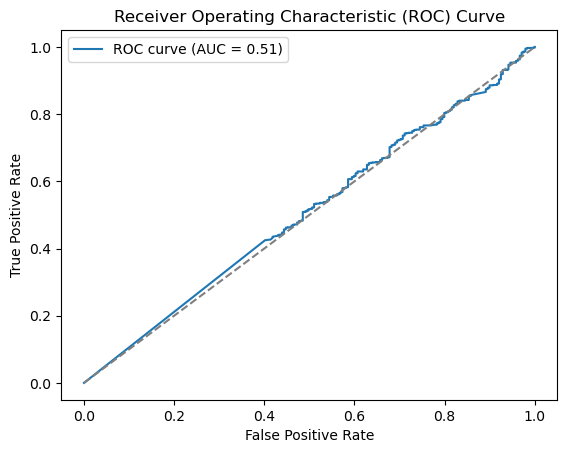

38/38 [==============================] - 0s 6ms/step
Model: CNN
Loss: 0.012754113413393497
Accuracy: 0.9902245998382568
Precision: 0.9092849519743863
Recall: 0.8847352024922118
F1 Score: 0.8968421052631578
AUC-ROC: 0.8739273626263812


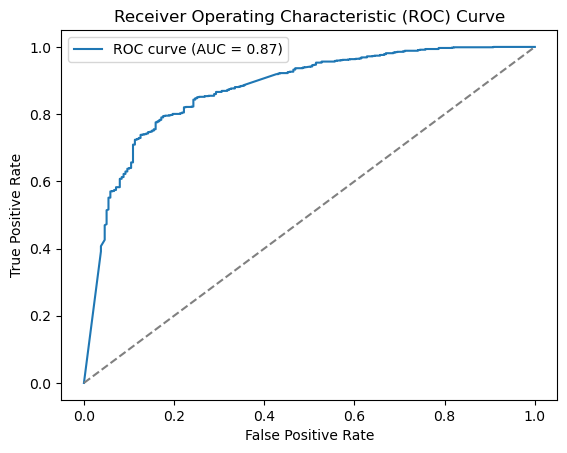

38/38 [==============================] - 1s 34ms/step
Model: LSTM
Loss: 0.0002512922801543027
Accuracy: 1.0
Precision: 0.8998998998998999
Recall: 0.9335410176531672
F1 Score: 0.9164118246687054
AUC-ROC: 0.8708989950338248


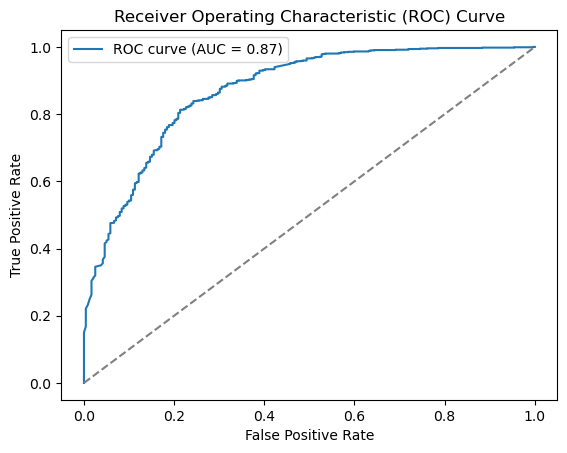

Model: XGB
Accuracy: 0.800332778702163
Precision: 0.8113695090439277
Recall: 0.9781931464174455
F1 Score: 0.8870056497175142
AUC-ROC: 0.6370064781866291


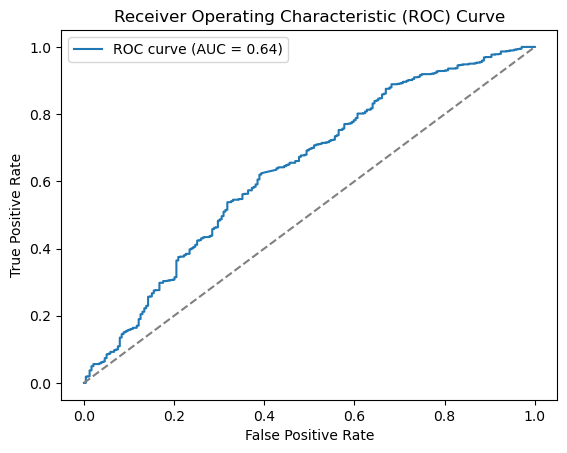

Model: Random Forest
Accuracy: 0.7928452579034941
Precision: 0.8109756097560976
Recall: 0.9667705088265836
F1 Score: 0.8820464234959735
AUC-ROC: 0.6319381987078385


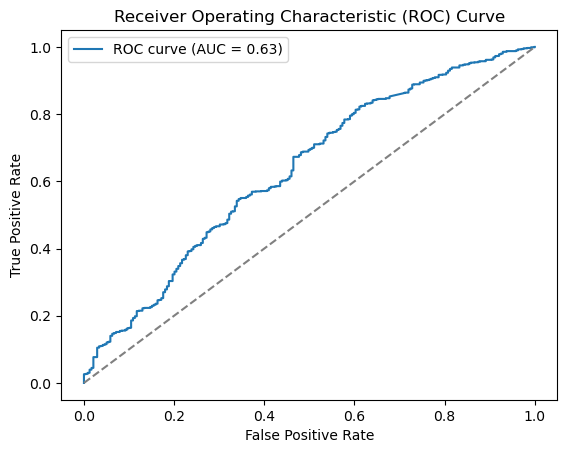

Model: Gradient Boosting
Accuracy: 0.800332778702163
Precision: 0.8213333333333334
Recall: 0.9595015576323987
F1 Score: 0.8850574712643678
AUC-ROC: 0.6571861816064686


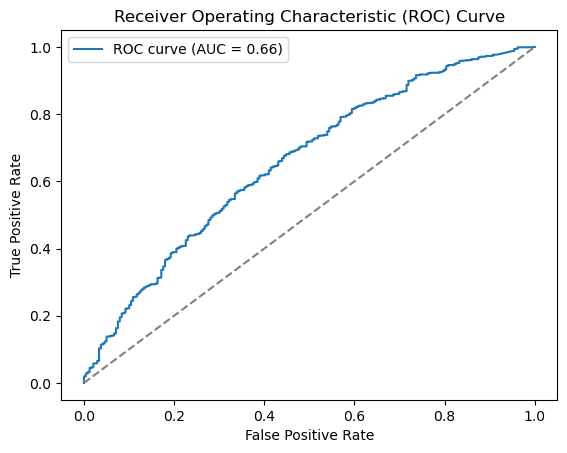

Model: AdaBoost
Accuracy: 0.800332778702163
Precision: 0.8009991673605329
Recall: 0.9989615784008308
F1 Score: 0.88909426987061
AUC-ROC: 0.6103203465460533


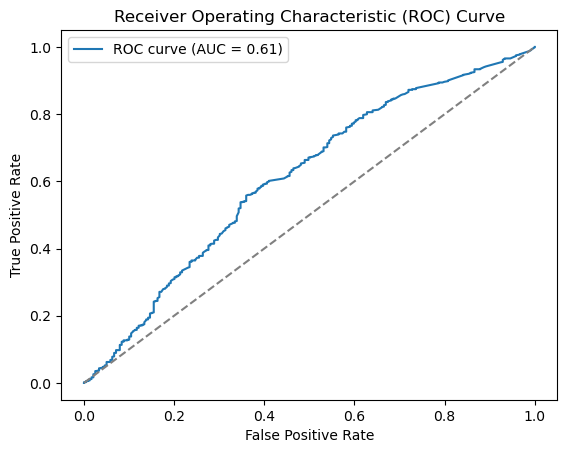

Model: Logistic Regression
Accuracy: 0.7920133111480865
Precision: 0.8008438818565401
Recall: 0.9854620976116303
F1 Score: 0.8836126629422718
AUC-ROC: 0.51324096160447


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


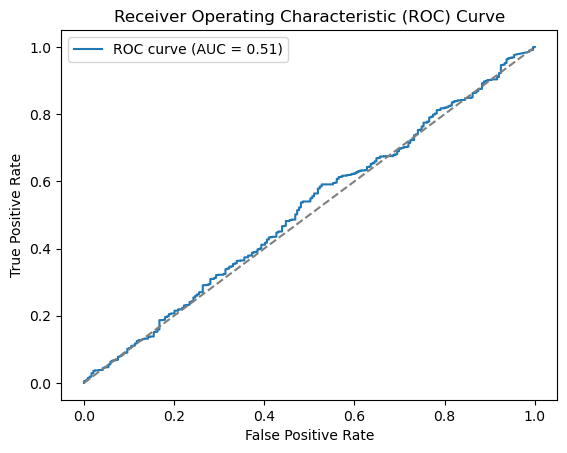

Model: DecisionTreeClassifier
Accuracy: 0.7878535773710482
Precision: 0.8149466192170819
Recall: 0.9511941848390446
F1 Score: 0.877815045519885
AUC-ROC: 0.6076221883323123


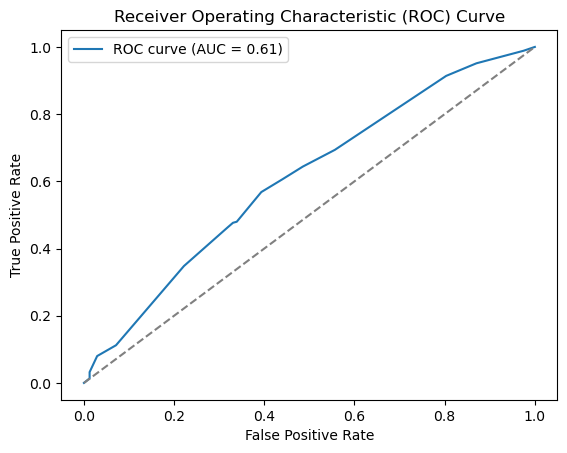

Model: SVM
Accuracy: 0.8011647254575707
Precision: 0.8011647254575707
Recall: 1.0
F1 Score: 0.889607390300231
AUC-ROC: 0.47596206068031827


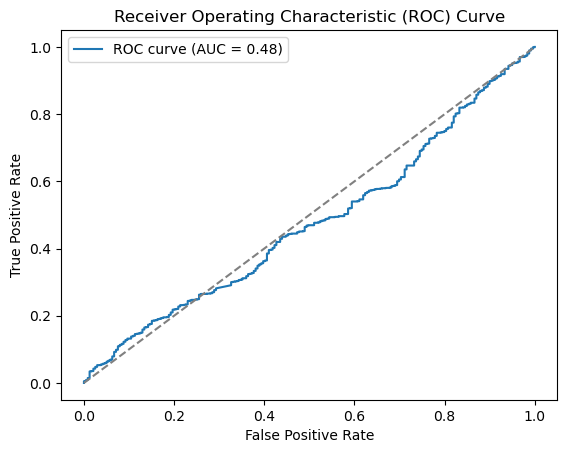

In [26]:
for model_name, model in models.items():
    if model_name in ['CNN', 'LSTM']:
        # Train the deep learning models
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        history = model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs=10, batch_size=32, verbose=0)
        probabilities = model.predict(test_data).flatten()
        predictions = (probabilities > 0.5).astype(int)
        loss = history.history['loss'][-1]
        accuracy = history.history['accuracy'][-1]
        
        precision = precision_score(test_labels, predictions)
        recall = recall_score(test_labels, predictions)
        f1 = f1_score(test_labels, predictions)
        auc_roc = roc_auc_score(test_labels, probabilities)
        fpr, tpr, thresholds = roc_curve(test_labels, probabilities)
    else:
        # Train the other models
        model.fit(train_data, train_labels)
        probabilities = model.predict_proba(test_data)[:, 1]
        predictions = model.predict(test_data)
        loss = None  # No loss calculation for non-deep learning models
        
        accuracy = accuracy_score(test_labels, predictions)
        precision = precision_score(test_labels, predictions)
        recall = recall_score(test_labels, predictions)
        f1 = f1_score(test_labels, predictions)
        auc_roc = roc_auc_score(test_labels, probabilities)
        fpr, tpr, thresholds = roc_curve(test_labels, probabilities)
    
    # Print the results
    print(f"Model: {model_name}")
    if loss is not None:
        print(f"Loss: {loss}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"AUC-ROC: {auc_roc}")
    

    # Plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()